# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



---
### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### **From Moro, et. al:**

The data was collected from a Portuguese bank  that  used  its own  contact-center  to  do  directed  marketing  campaigns. The telephone, with a human agent as the interlocutor, was the dominant marketing channel, although sometimes with an  auxiliary  use  of  the  Internet  online  banking  channel (e.g.  by  showing  information  to  specific  targeted  client). 

Furthermore, each campaign was managed in an integrated fashion  and  the  results  for  all  channels  were  outputted together. The dataset collected is related to <u>**17 campaigns**</u> that occurred between May 2008 and November 2010, corresponding  to  a  total  of  79354  contacts.  During  these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered. For each contact,  a  large  number  of  attributes  was  stored  (e.g.  see Table  2)  and  if  there  was  a  success  (the  target  variable). For the whole database considered, there were 6499 successes (8% success rate). 

**It's evident that the primary goal for this business use-case is to improve the efficacy of marketing campaigns**

#### **Additional Information**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Imports for Notebook

In [87]:
# Data Manipulation
import pandas as pd
import numpy as np

# Modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

# System
import time
from datetime import datetime

# Visualization
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Aux
import warnings
warnings.filterwarnings('ignore')

---
### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [89]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [90]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [91]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [92]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


---
### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.

**Input variables:**

1. **age** (numeric)
2. **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. **education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. **default**: has credit in default? (categorical: 'no','yes','unknown')
6. **housing**: has housing loan? (categorical: 'no','yes','unknown')
7. **loan**: has personal loan? (categorical: 'no','yes','unknown')
8. **contact**: contact communication type (categorical: 'cellular','telephone')
9. **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. **previous**: number of contacts performed before this campaign and for this client (numeric)
15. **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
16. **emp.var.rate**: employment variation rate - quarterly indicator (numeric)
17. **cons.price.idx**: consumer price index - monthly indicator (numeric)
18. **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)
19. **euribor3m**: euribor 3 month rate - daily indicator (numeric)
20. **nr.employed**: number of employees - quarterly indicator (numeric)
21. **y** - has the client subscribed a term deposit? (binary: 'yes','no') [TARGET VARIABLE]


### Missing Values

In [93]:
# Checking for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Checking data types

In [94]:
for col in df.columns:
    print(f'\n{col} -------------')
    if df[col].dtype == 'object':
        # Categorical columns and checking unique values
        print(f"Object type, therefore should be categorical. \nValues: {df[col].unique()}")
    else:
        # Numerical columns and checking unique values
        print(f"{df[col].dtype} type, therefore should be numerical. {col} has {len(df[col].unique())} unqiue values")


age -------------
int64 type, therefore should be numerical. age has 78 unqiue values

job -------------
Object type, therefore should be categorical. 
Values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital -------------
Object type, therefore should be categorical. 
Values: ['married' 'single' 'divorced' 'unknown']

education -------------
Object type, therefore should be categorical. 
Values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default -------------
Object type, therefore should be categorical. 
Values: ['no' 'unknown' 'yes']

housing -------------
Object type, therefore should be categorical. 
Values: ['no' 'yes' 'unknown']

loan -------------
Object type, therefore should be categorical. 
Values: ['no' 'yes' 'unknown']

contact -------------
Object type, therefore should be categorical. 
Valu

#### NOTE: In reviewing the missing value counts and data types, there are no gaps in the data and no data types need to be converted at this time

---
### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**Primary goal for this business use-case is to improve the efficacy of marketing campaigns by understanding the factors that influence a term deposit**

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

---
### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

### NOTE: I could drop the unknowns and do binary classification if needed

In [96]:
initial_df = df.copy()

In [97]:
# For encoding, we will use one-hot encoding for categorical variables and label encoding for ordinal variables.

# First seven columns
initial_columns = ['age','job', 'marital', 'education', 'default', 'housing', 'loan', 'y']

initial_df = initial_df[initial_columns]

# Label encoding for ordinal variables
label_encoder = LabelEncoder()
cols_label_encode = ['y']
for col in cols_label_encode:
    initial_df[col] = label_encoder.fit_transform(initial_df[col])

# One-hot encoding for categorical variables
cols_one_hot_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan']
initial_df = pd.get_dummies(initial_df, columns=cols_one_hot_encode)

In [98]:
initial_df.head(10)

,age,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,56,0,False,False,False,True,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,57,0,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,True,False,False
2,37,0,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,True,True,False,False
3,40,0,True,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
4,56,0,False,False,False,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
5,45,0,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,True,False,False
6,59,0,True,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
7,41,0,False,True,False,False,False,False,False,False,...,True,False,True,False,True,False,False,True,False,False
8,24,0,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,True,False,False
9,25,0,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,True,True,False,False


---
### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [99]:
# Splitting the data into train and test sets
X = initial_df.drop('y', axis=1)
y = initial_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---
### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [100]:
# No confidence model (Baseline)
# The Dummy Classifier is a classifier that makes predictions using simple rules, which can be useful as 
# a baseline for comparison against actual classifiers, especially with imbalanced classes.

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

dummy_acc_train = accuracy_score(y_train, dummy_clf.predict(X_train))
dummy_acc_test = accuracy_score(y_test, y_pred)

print(f"DummyClassifier accuracy train: {round(dummy_acc_train,4)}")
print(f"DummyClassifier accuracy test: {round(dummy_acc_test,4)}")


DummyClassifier accuracy train: 0.8876
DummyClassifier accuracy test: 0.8865


---
### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [101]:
# Logistic Regression
log_reg = LogisticRegression()
lr_start = time.time()
log_reg.fit(X_train, y_train)
lr_train_time = time.time() - lr_start
y_pred_lr = log_reg.predict(X_test)

---
### Problem 9: Score the Model

What is the accuracy of your model?

In [102]:
lr_acc_train = accuracy_score(y_train, log_reg.predict(X_train))
lr_acc_test = accuracy_score(y_test, y_pred_lr)

print(f"LogisticRegression accuracy train: {round(lr_acc_train,4)}")
print(f"LogisticRegression accuracy test: {round(lr_acc_test,4)}")

LogisticRegression accuracy train: 0.8876
LogisticRegression accuracy test: 0.8865


---
### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [103]:
df_model_performance = pd.DataFrame(columns=['model', 'train_time', 'train_accuracy', 'test_accuracy'])
df_model_performance.loc[0] = ['LogisticRegression', lr_train_time, lr_acc_train, lr_acc_test]

### KNN Classifier

In [104]:
# KNN Classifier

model_knn = KNeighborsClassifier()
start = time.time()
model_knn.fit(X_train, y_train)
train_time = time.time() - start
train_acc = accuracy_score(y_train, model_knn.predict(X_train.values))
test_acc = accuracy_score(y_test, model_knn.predict(X_test.values))

df_model_performance.loc[1] = ['KNN Classifier', train_time, train_acc, test_acc]

print(f'  Training time: {round(train_time, 3)}s')
print(f'  Train accuracy: {round(train_acc, 4)}')
print(f'  Test accuracy: {round(test_acc, 4)}')


  Training time: 0.018s
  Train accuracy: 0.8907
  Test accuracy: 0.8746


### Decision Tree Classifier

In [105]:
# Decision Tree Classifier

model_dt = DecisionTreeClassifier()
start = time.time()
model_dt.fit(X_train, y_train)

train_time = time.time() - start
train_acc = accuracy_score(y_train, model_dt.predict(X_train.values))
test_acc = accuracy_score(y_test, model_dt.predict(X_test.values))

df_model_performance.loc[2] = ['Decision Tree Classifier', train_time, train_acc, test_acc]

print(f'  Training time: {round(train_time, 3)}s')
print(f'  Train accuracy: {round(train_acc, 4)}')
print(f'  Test accuracy: {round(test_acc, 4)}')

  Training time: 0.095s
  Train accuracy: 0.9166
  Test accuracy: 0.8627


### Support Vector Machine

In [106]:
# Support Vector Machine Classifier

model_svm = SVC()
start = time.time()
model_svm.fit(X_train, y_train)

train_time = time.time() - start
train_acc = accuracy_score(y_train, model_svm.predict(X_train.values))
test_acc = accuracy_score(y_test, model_svm.predict(X_test.values))

df_model_performance.loc[3] = ['Support Vector Machine Classifier', train_time, train_acc, test_acc]

print(f'  Training time: {round(train_time, 3)}s')
print(f'  Train accuracy: {round(train_acc, 4)}')
print(f'  Test accuracy: {round(test_acc, 4)}')


  Training time: 11.453s
  Train accuracy: 0.8876
  Test accuracy: 0.8865


In [107]:
df_model_performance

,model,train_time,train_accuracy,test_accuracy
0,LogisticRegression,0.378885,0.887557,0.886502
1,KNN Classifier,0.018180,0.890744,0.874605
2,Decision Tree Classifier,0.094585,0.916601,0.862709
3,Support Vector Machine Classifier,11.453028,0.887557,0.886502


---
### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Feature Exploration

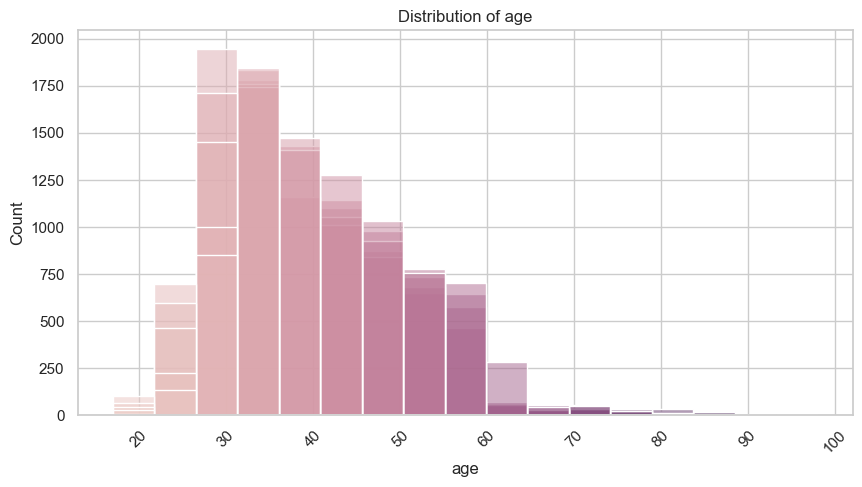

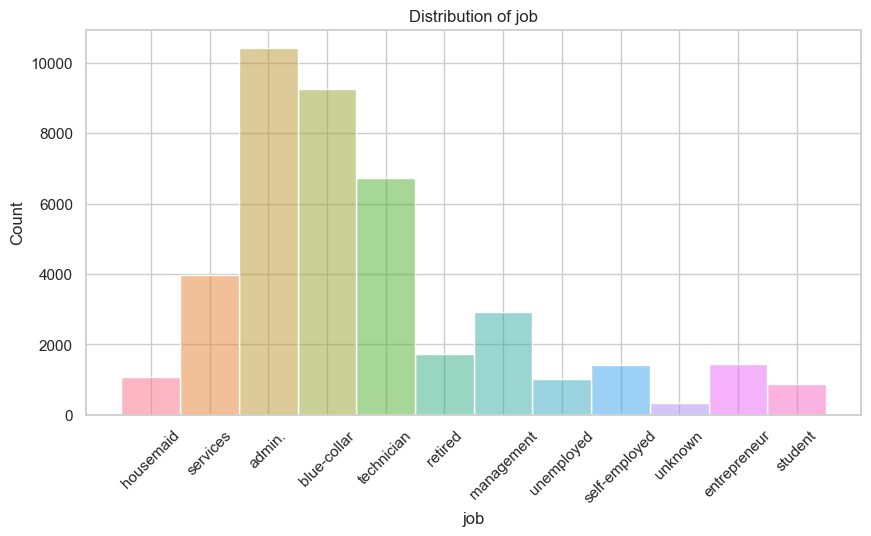

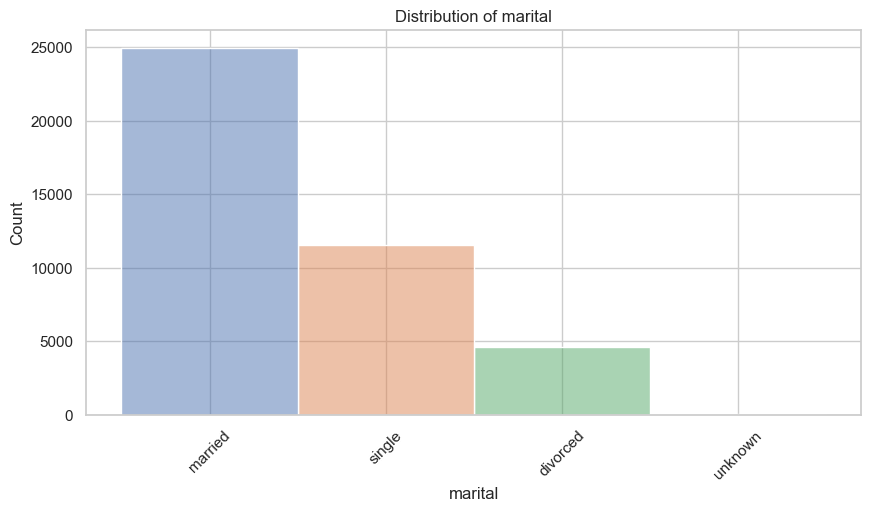

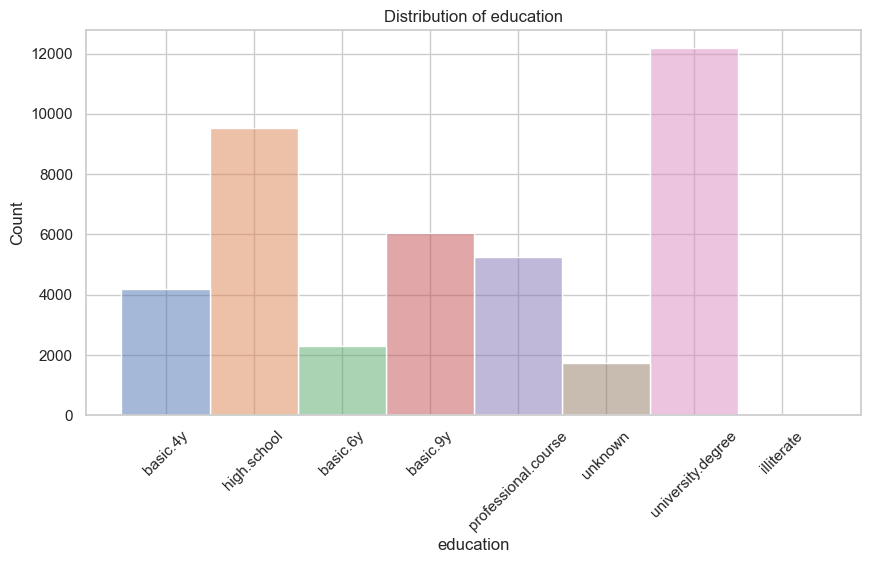

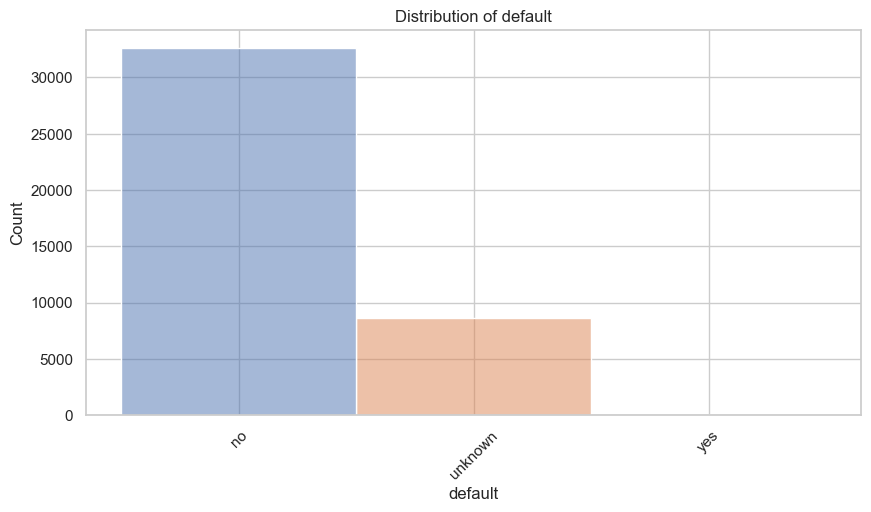

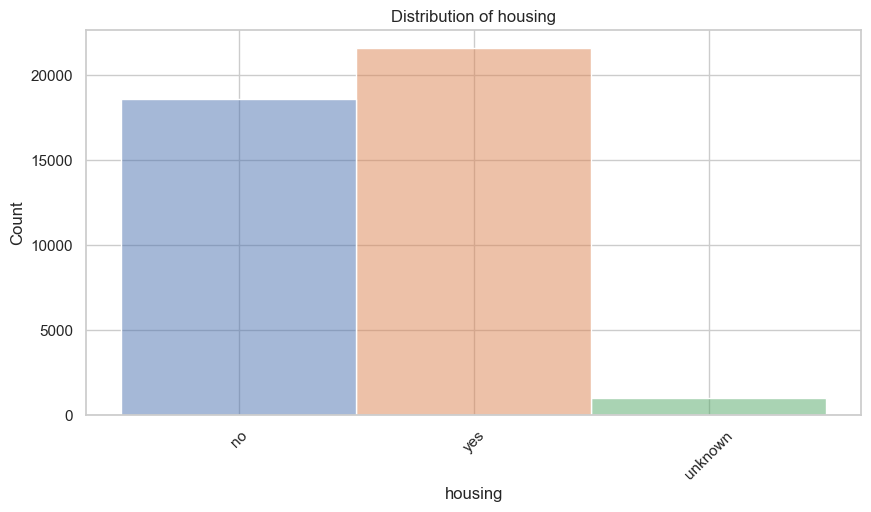

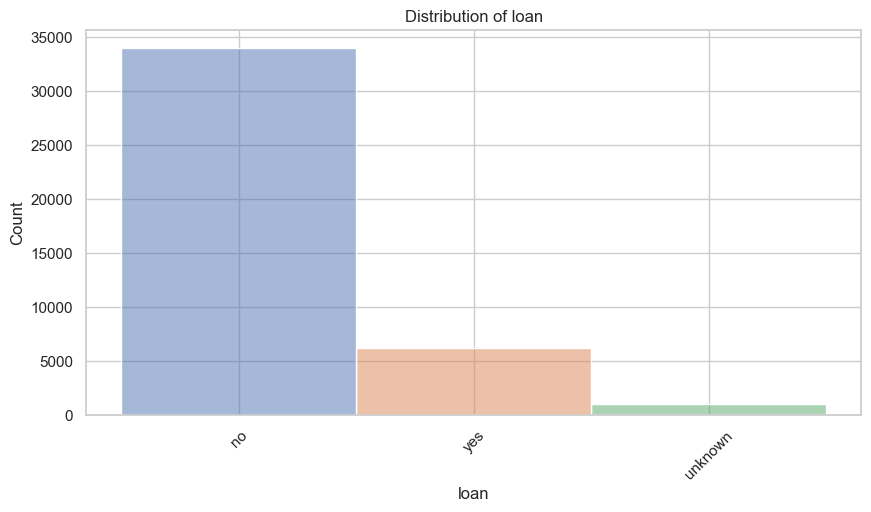

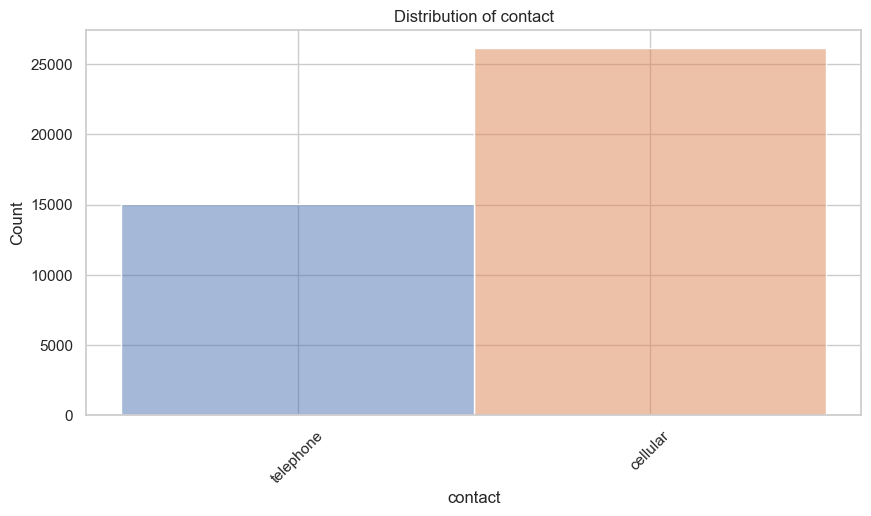

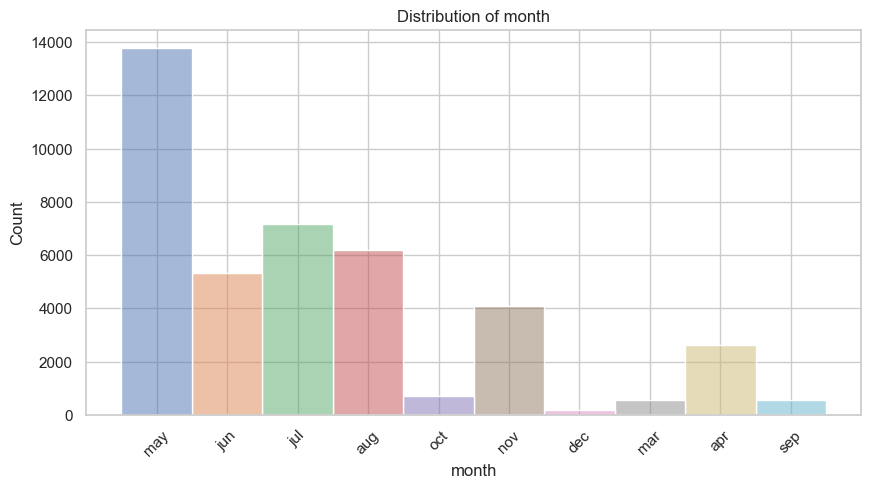

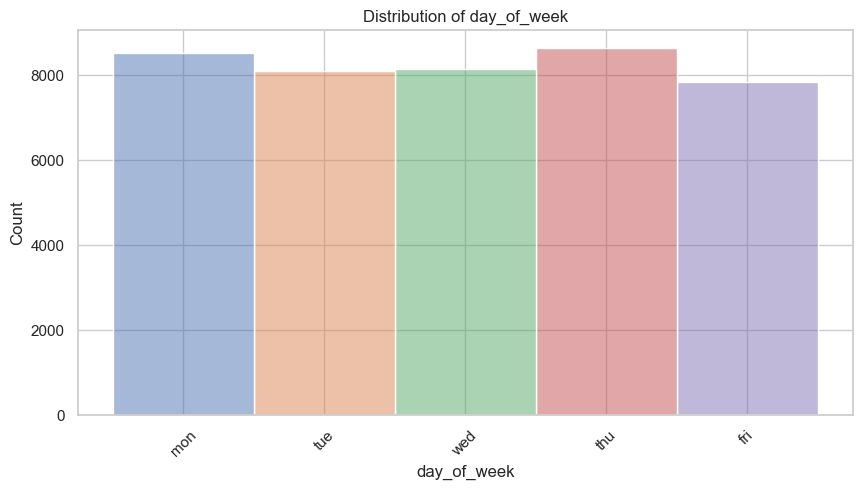

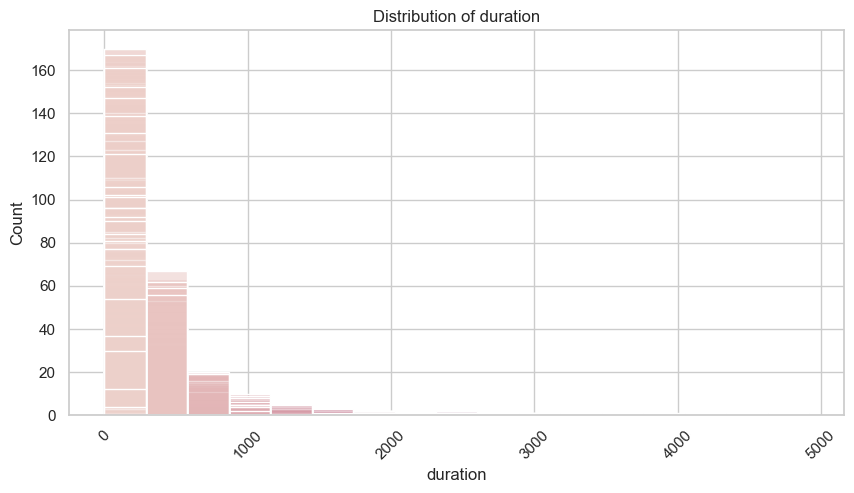

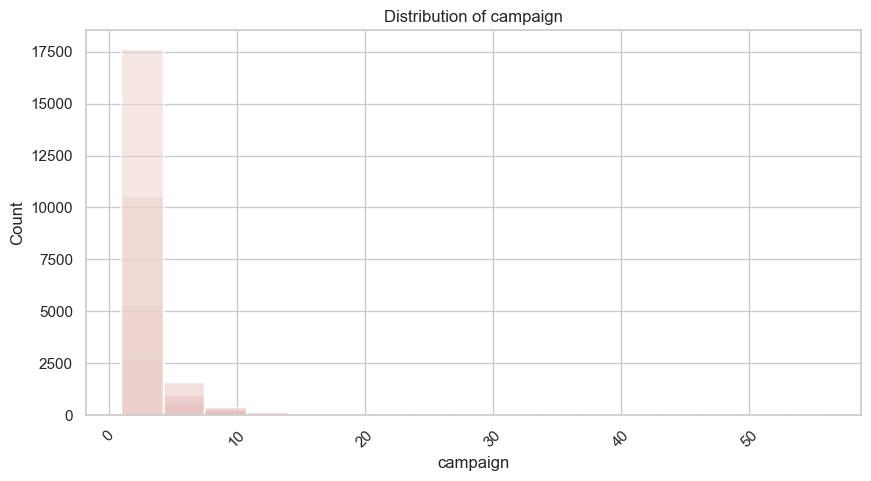

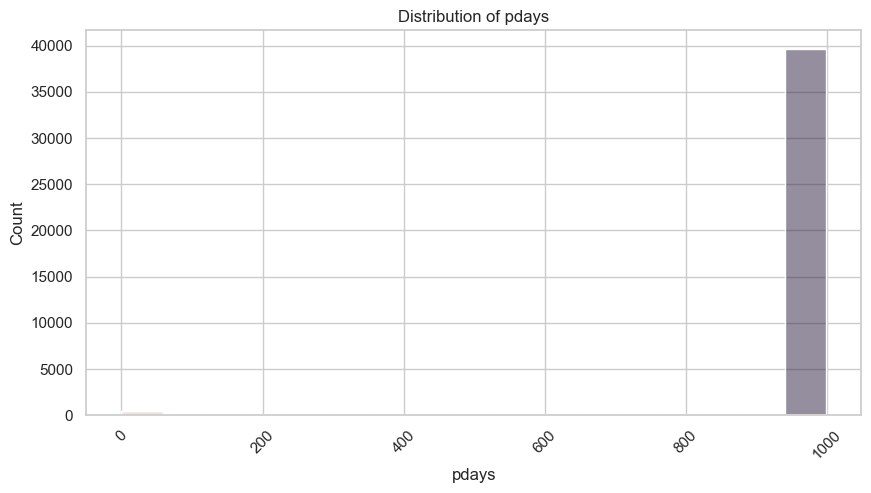

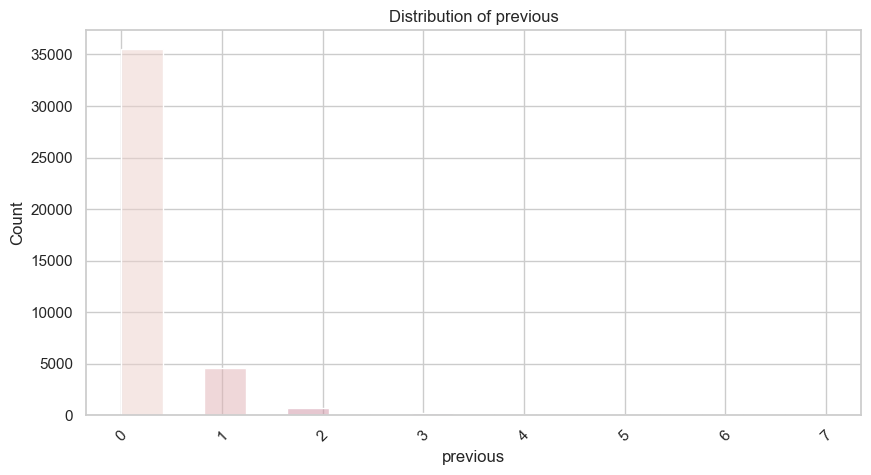

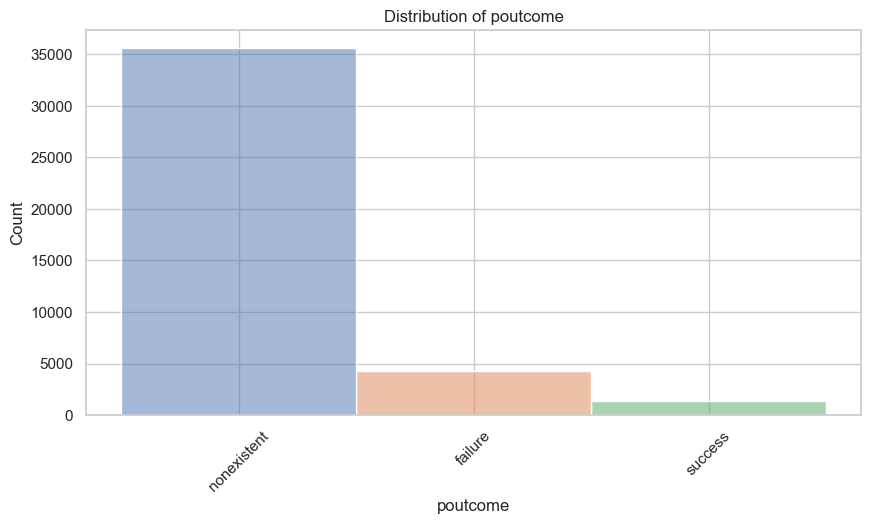

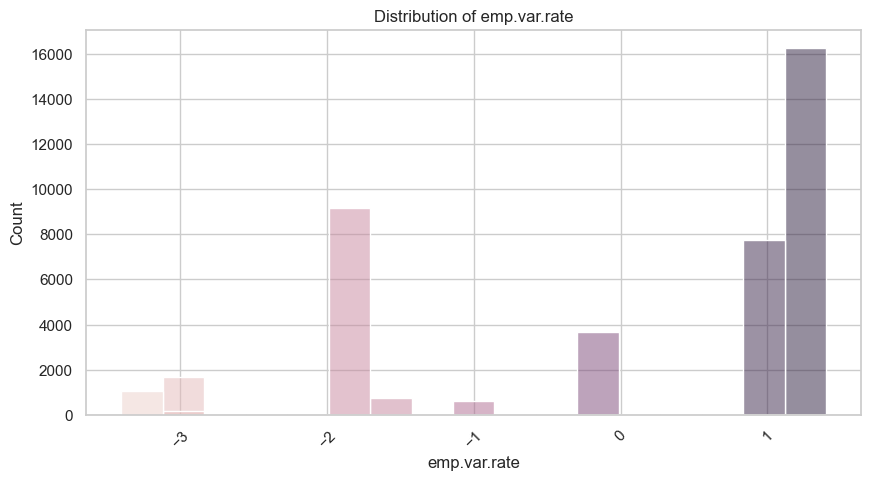

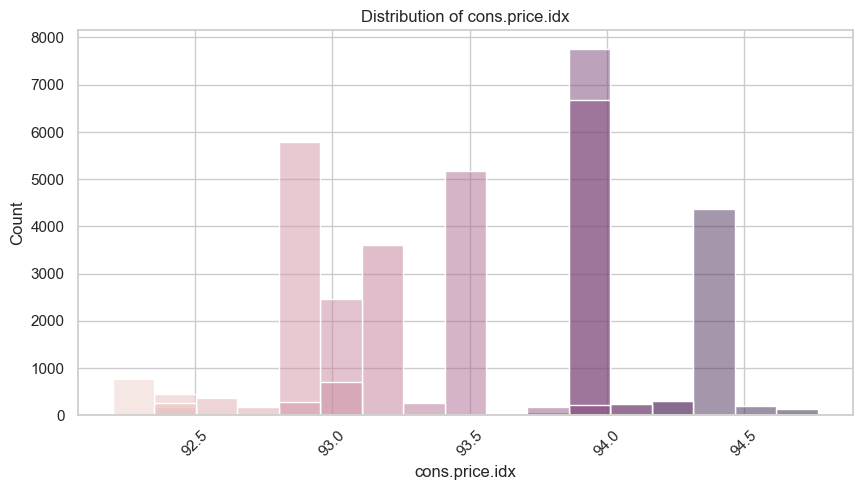

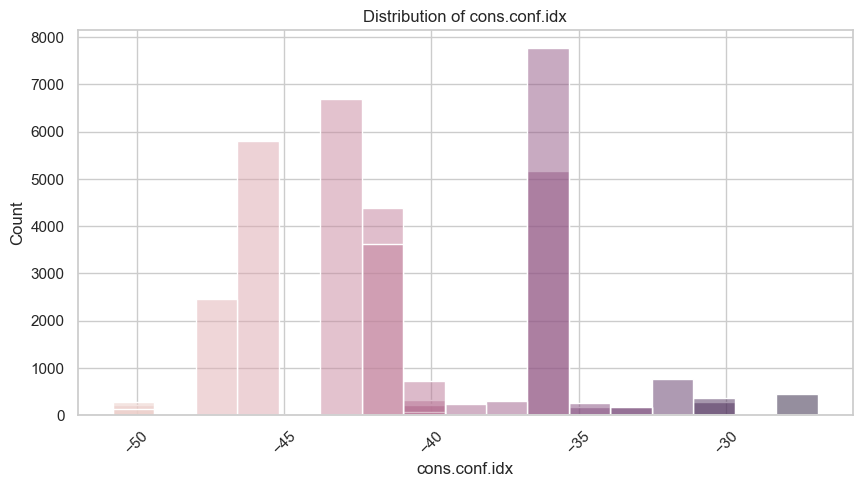

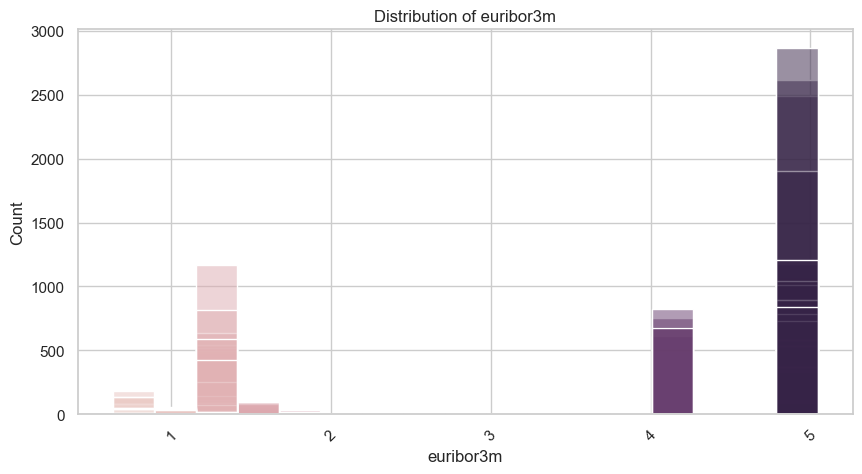

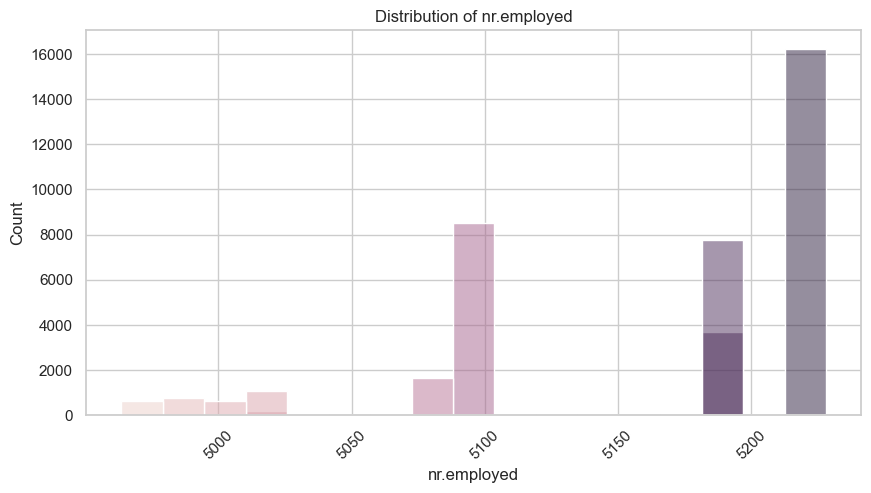

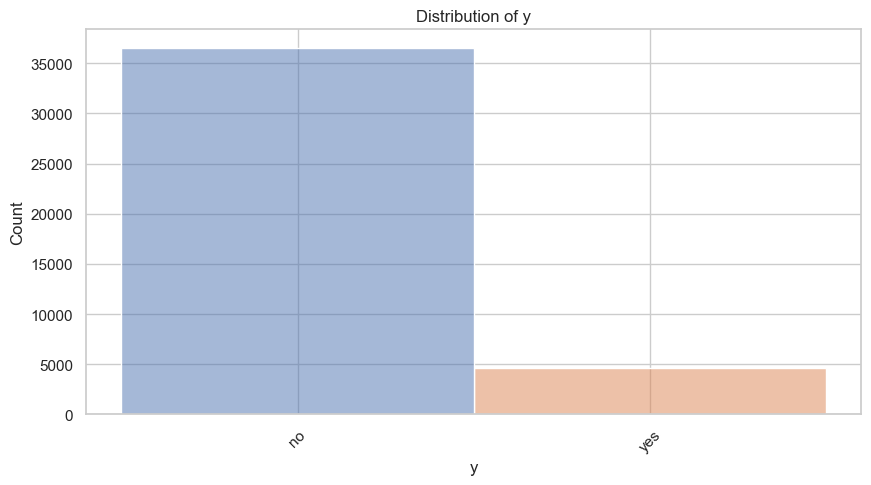

In [108]:
# Using seaborn to plot the distribution 

for col in df.columns:
    # if df[col].dtype == 'object':
    # Plotting
    fig = plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, hue=col, bins='sturges')

    # Formatting
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.legend([],[], frameon=False)

    # Saving
    plt.show()
    plt.savefig(f'images/{col}.png')
    plt.close()

#### NOTE: After feature exploration, several features were skewed or heavily biased (previous, pdays, poutcome) and therefore will be removed. The rest appear useable so they'll be encoded and models

In [109]:
second_df = df.copy()
cols_to_drop = ['pdays', 'previous', 'poutcome']
second_df.drop(cols_to_drop, axis=1, inplace=True)

In [110]:
# Similar to before, we will use one-hot encoding for categorical variables and label encoding for ordinal variables.

# Label encoding for ordinal variables
label_encoder = LabelEncoder()
cols_label_encode = ['month', 'day_of_week', 'y']
for col in cols_label_encode:
    second_df[col] = label_encoder.fit_transform(second_df[col])

# One-hot encoding for categorical variables
cols_one_hot_encode = ['job', 'marital', 'loan', 'education', 'default', 'housing', 'contact', 'month', 'day_of_week']
second_df = pd.get_dummies(second_df, columns=cols_one_hot_encode)

In [111]:
second_df.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,...,month_5,month_6,month_7,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,False,...,False,True,False,False,False,False,True,False,False,False
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,False,...,False,True,False,False,False,False,True,False,False,False
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,False,...,False,True,False,False,False,False,True,False,False,False
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,True,...,False,True,False,False,False,False,True,False,False,False
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,False,...,False,True,False,False,False,False,True,False,False,False


In [119]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(second_df.drop('y', axis=1), second_df['y'], test_size=0.2, random_state=42)

### Hyperparameter Tuning and Evaluation metrics

**Hyperparameter Tuning**

Below is a function called train_model_performance which performs the gridsearch. The models and their param_grids are defined in model_dict one cell below the function. 

**Evaluation Metrics**

Regarding performance metrics, I am also adding the classification report and the Area Under the receiver operating characteristic Curve, or AUC, score in addition to accuracies scores. The classification report includes all common metrics including: precision, recall, f1-score, and support. The AUC score provides a more wholistic score when it comes to class discrimination with imbalanced datasets. 

### Modeling

In [124]:
df_model_performance_second_iteration = pd.DataFrame(columns=['model', 'best_parameters', 'train_time', 'train_accuracy', 'test_accuracy', 'roc_auc_score', 'classification_report', 'feature_importance'])

In [132]:
def train_model_performance(model, model_name, param_grid, X_train, y_train, X_test, y_test):
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # Grid Search and timing
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    start = time.time()
    grid_search.fit(X_train, y_train)
    train_time = time.time() - start

    # Performance
    train_acc = accuracy_score(y_train, grid_search.predict(X_train))
    test_acc = accuracy_score(y_test, grid_search.predict(X_test))
    y_pred_proba = grid_search.predict_proba(X_test)[::,1]
    auc_score = roc_auc_score(y_test, y_pred_proba)

    # Save ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC curve {model_name}')
    layout = go.Layout(title='Receiver Operating Characteristic',
                    xaxis=dict(title='False Positive Rate'),
                    yaxis=dict(title='True Positive Rate'),
                    showlegend=False)


    fig = go.Figure(data=[trace], layout=layout)
    fig.write_image(f'images/roc_{model_name}.png')

    # Reporting
    print("Best Parameters: ", grid_search.best_params_)
    print("Training time: ", train_time)
    print("Train Accuracy: ", accuracy_score(y_train, grid_search.predict(X_train)))
    print("Test Accuracy: ", accuracy_score(y_test, grid_search.predict(X_test)))
    print("AUC Score: ", auc_score)
    print("Classification Report: \n", classification_report(y_test, grid_search.predict(X_test)))
    try:
        feature_importance = grid_search.best_estimator_.feature_importances_
        feature_dict = dict(zip(X_train.columns, feature_importance))
        print("Feature Importances: ", feature_dict)
    except:
        feature_dict = None

    # Returning as dicts
    df_dict = {
        'model': model_name,
        'best_parameters': grid_search.best_params_,
        'train_time': train_time,
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'roc_auc_score': auc_score,
        'classification_report': str(classification_report(y_test, grid_search.predict(X_test))),
        'feature_importance': feature_dict}
    roc_dict = {'model': model_name,'fpr': fpr, 'tpr': tpr}
    return df_dict, roc_dict


In [133]:
model_dict = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=500),
        'param_grid': {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
        },
    'KNN Classifier': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance']}
        },
    'Decision Tree Classifier': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [3, 5, 7, 9, 11],
            'min_samples_split': [2, 5, 10],
            'min_impurity_decrease': [0.0, 0.1, 0.2],
            'criterion': ['gini', 'entropy']}
        },
    'Support Vector Machine Classifier': {
        'model': SVC(probability=True),
        # Due to the time it takes to run, I have reduced the number of parameters to test
        'param_grid': {
            'C': [0.1, 1, 10]
            }
        }
    }


In [134]:
roc_data = []

for model_name, model_params in model_dict.items():
    print(f"{datetime.now().strftime('%H:%M:%S')} Training {model_name}...")

    df_dict, roc_dict = train_model_performance(
        model_params['model'],
        model_name,
        model_params['param_grid'],
        X_train_2,
        y_train_2,
        X_test_2,
        y_test_2)

    df_model_performance_second_iteration = pd.concat([df_model_performance_second_iteration, pd.DataFrame(df_dict, index=[0])])
    roc_data.append(roc_dict)

22:11:07 Training Logistic Regression...


/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best Parameters:  {'C': 10}
Training time:  8.143890857696533
Train Accuracy:  0.9063429438543248
Test Accuracy:  0.9081087642631707
AUC Score:  0.9274251809197158
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7303
           1       0.66      0.39      0.49       935

    accuracy                           0.91      8238
   macro avg       0.79      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238

22:11:16 Training KNN Classifier...
Best Parameters:  {'n_neighbors': 11, 'weights': 'uniform'}
Training time:  16.61599588394165
Train Accuracy:  0.9183308042488619
Test Accuracy:  0.9085943190094683
AUC Score:  0.9082091382854163
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.62      0.50      0.55       935

    accuracy                           0.91      8238
   macro 

## Model and Performance Comparison

In comparing the first iteration to the second, we can see that including additional features while eliminating others improved the overall performance. In addition, correcting encoding these features have improved their overall usability. 

In [136]:
# First Iteration
df_model_performance

,model,train_time,train_accuracy,test_accuracy
0,LogisticRegression,0.378885,0.887557,0.886502
1,KNN Classifier,0.018180,0.890744,0.874605
2,Decision Tree Classifier,0.094585,0.916601,0.862709
3,Support Vector Machine Classifier,11.453028,0.887557,0.886502


In [141]:
# Second Iteration
df_model_performance_second_iteration

,model,best_parameters,train_time,train_accuracy,test_accuracy,roc_auc_score,classification_report,feature_importance
2,Logistic Regression,NaN,8.143891,0.906343,0.908109,0.927425,precision recall f1-score ...,None
3,KNN Classifier,NaN,16.615996,0.918331,0.908594,0.908209,precision recall f1-score ...,None
4,Decision Tree Classifier,NaN,19.493136,0.917785,0.906409,0.923294,precision recall f1-score ...,None
5,Support Vector Machine Classifier,NaN,529.258244,0.894841,0.894513,0.923732,precision recall f1-score ...,None


In [142]:
# Combined ROC Curve
fig = go.Figure()
for roc_dict in roc_data:
    fig.add_trace(go.Scatter(x=roc_dict['fpr'], y=roc_dict['tpr'], mode='lines', name=roc_dict['model']))
fig.update_layout(title='Receiver Operating Characteristic',
                    xaxis=dict(title='False Positive Rate'),
                    yaxis=dict(title='True Positive Rate'))
fig.write_image('images/roc_combined.png')
fig.show()

In observing the final performance of the models, it appears that the Decision Tree model performs the best. From this, we can extract our feature importances and recommend this model moving forward

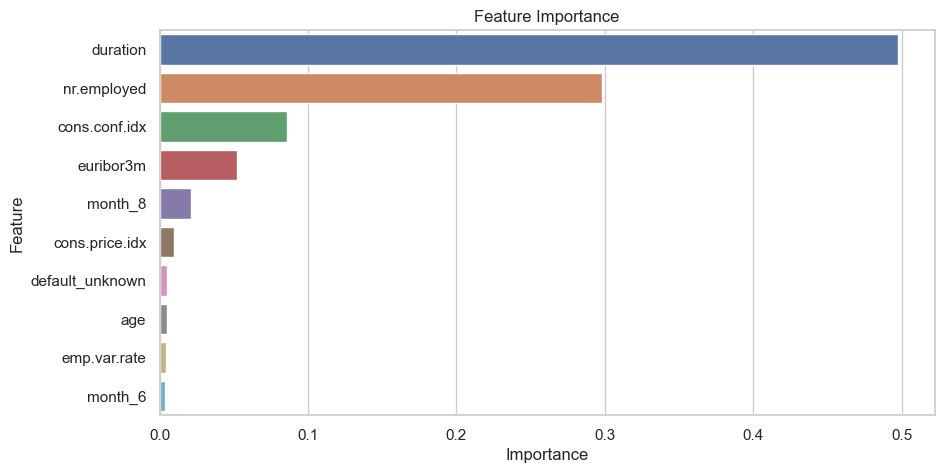

In [145]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_impurity_decrease=0.0, min_samples_split=5)
dtc.fit(X_train_2, y_train_2)

# Feature Importance
feature_importance = dtc.feature_importances_
feature_dict = dict(zip(X_train_2.columns, feature_importance))

# Top 10 Features
feature_dict = dict(sorted(feature_dict.items(), key=lambda item: item[1], reverse=True)[:10])

# Plot by Importance
fig = plt.figure(figsize=(10, 5))
sns.barplot(x=list(feature_dict.values()), y=list(feature_dict.keys()))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

---
# Conclusions and Take-aways

Based on these the analysis and findings, we determined that the Decision Tree model performed the best. In expanding on this model and looking at the important inputs to the model, we found the following features to be the most critical:

1. Duration 
2. Number of Employees
3. Consumer Confidence Index

With this in mind, we can direct marketing campaigns around groups that exhibit these features or during these times (like months or when indexes hit specific values). This is turn will improve our overall conversion rate into long term deposits and boosts our profits. 